In [1]:
%reset -f

In [2]:
import gc
gc.collect()

0

In [3]:
import pandas as pd
import numpy as np
import glob 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [4]:
import pandas as pd

# Specify the file path
file_path = r"D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\final_df_alternate.csv"

# Read the CSV file into a DataFrame
final_df = pd.read_csv(file_path)

# Display the DataFrame in the Jupyter Notebook
final_df

Defect  Velocity    KM      x_dx     y_dx     z_dx      x_sx  \
0             91       200  7800  0.004723  0.26856  0.18600 -1.007200   
1             91       200  7800 -0.134050  0.27157 -0.17156  1.027900   
2             91       200  7800 -2.347500 -0.37100  0.23263  0.908330   
3             91       200  7800 -0.385100  1.00000  0.97645  0.030874   
4             91       200  7800  0.327980  0.67395 -1.21000  0.336290   
...          ...       ...   ...       ...      ...      ...       ...   
11509815       4       200  2300  1.254100 -0.78066 -1.08860  0.528310   
11509816       4       200  2300 -0.638330 -0.40803 -2.31060 -0.576500   
11509817       4       200  2300 -0.274890 -0.23506 -2.61920 -0.995470   
11509818       4       200  2300  0.788010 -0.78825 -1.84580  0.224870   
11509819       4       200  2300  0.310340 -0.94051 -1.47860 -0.354590   

             y_sx      z_sx  Class  
0        -0.87431 -1.702100  crack  
1         0.74303 -2.137200  crack  
2         0.69077 -1.486400  crack  
3         0.57155 -0.554000  crack  
4         2.05060 -0.439640  crack  
...           ...       ...    ...  
11509815 -0.55756  0.057628   wear  
11509816  0.25319 -0.492990   wear  
11509817 -0.51096 -0.231630   wear  
11509818 -0.76667  1.166900   wear  
11509819  0.65213  0.683700   wear  

[11509820 rows x 10 columns]

Our first approach was to perform a Fast Fourier Transform on the given vibrational acceleration data. We performed a decision tree using the calculated vibrational acceleration magnitude, frequency, and amplitude of the FFT transformation. This did not work, however, as we got an accuracy of a mere 30%.


Then when we received the radius of the wheel from the company, we tried to identify the characteristics of the two classes as “changes in the vibrational acceleration across one rotation of the wheel”


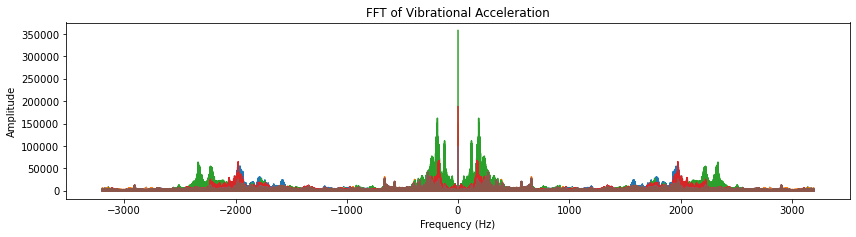

In [5]:
# Sample data
fs = 6400  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time array

# Perform FFT on vibrational acceleration
final_df["fft_vibrational_acceleration_dx_x"]=np.fft.fft(final_df["x_dx"])
final_df["fft_vibrational_acceleration_dx_y"]=np.fft.fft(final_df["y_dx"])
final_df["fft_vibrational_acceleration_dx_z"]=np.fft.fft(final_df["z_dx"])
final_df["fft_vibrational_acceleration_sx_x"]=np.fft.fft(final_df["x_sx"])
final_df["fft_vibrational_acceleration_sx_y"]=np.fft.fft(final_df["y_sx"])
final_df["fft_vibrational_acceleration_sx_z"]=np.fft.fft(final_df["z_sx"])

final_df["fft_freq_vibrational_acceleration_dx_x"] = np.fft.fftfreq(len(final_df["fft_vibrational_acceleration_dx_x"]), 1/fs)
final_df["fft_freq_vibrational_acceleration_dx_y"] = np.fft.fftfreq(len(final_df["fft_vibrational_acceleration_dx_y"]), 1/fs)
final_df["fft_freq_vibrational_acceleration_dx_z"] = np.fft.fftfreq(len(final_df["fft_vibrational_acceleration_dx_z"]), 1/fs)
final_df["fft_freq_vibrational_acceleration_sx_x"] = np.fft.fftfreq(len(final_df["fft_vibrational_acceleration_sx_x"]), 1/fs)
final_df["fft_freq_vibrational_acceleration_sx_y"] = np.fft.fftfreq(len(final_df["fft_vibrational_acceleration_sx_y"]), 1/fs)
final_df["fft_freq_vibrational_acceleration_sx_z"] = np.fft.fftfreq(len(final_df["fft_vibrational_acceleration_sx_z"]), 1/fs)

# Plot the results
plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 2)
plt.plot(final_df["fft_freq_vibrational_acceleration_dx_x"], np.abs(final_df["fft_vibrational_acceleration_dx_x"]))
plt.title('FFT of Vibrational Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(final_df["fft_freq_vibrational_acceleration_dx_y"], np.abs(final_df["fft_vibrational_acceleration_dx_y"]))
plt.title('FFT of Vibrational Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(final_df["fft_freq_vibrational_acceleration_dx_z"], np.abs(final_df["fft_vibrational_acceleration_dx_z"]))
plt.title('FFT of Vibrational Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(final_df["fft_freq_vibrational_acceleration_sx_x"], np.abs(final_df["fft_vibrational_acceleration_sx_x"]))
plt.title('FFT of Vibrational Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(final_df["fft_freq_vibrational_acceleration_sx_y"], np.abs(final_df["fft_vibrational_acceleration_sx_y"]))
plt.title('FFT of Vibrational Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(final_df["fft_freq_vibrational_acceleration_sx_z"], np.abs(final_df["fft_vibrational_acceleration_sx_y"]))
plt.title('FFT of Vibrational Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')



plt.tight_layout()
plt.show()

The output graph allows you to compare frequencies and amplitudes to understand the vibrational characteristics of the system. Peaks in the amplitude spectrum at specific frequencies provide valuable information about the dominant vibrational patterns and their intensities.

In [6]:
final_df.head()

Defect  Velocity    KM      x_dx     y_dx     z_dx      x_sx     y_sx  \
0      91       200  7800  0.004723  0.26856  0.18600 -1.007200 -0.87431   
1      91       200  7800 -0.134050  0.27157 -0.17156  1.027900  0.74303   
2      91       200  7800 -2.347500 -0.37100  0.23263  0.908330  0.69077   
3      91       200  7800 -0.385100  1.00000  0.97645  0.030874  0.57155   
4      91       200  7800  0.327980  0.67395 -1.21000  0.336290  2.05060   

      z_sx  Class  ...  fft_vibrational_acceleration_dx_z  \
0 -1.70210  crack  ...          357552.4561038+0.0000000j   
1 -2.13720  crack  ...           258.375585-20835.937032j   
2 -1.48640  crack  ...         -859.379123-01079.2505640j   
3 -0.55400  crack  ...         -1510.740475-10701.894245j   
4 -0.43964  crack  ...           2989.337681+3369.180900j   

   fft_vibrational_acceleration_sx_x  fft_vibrational_acceleration_sx_y  \
0            187615.172467+0.000000j            -97940.023623-0.000000j   
1          -226.588822-16645.793127j           -218.397829-4781.223938j   
2           302.5173510+284.7514450j            25.166366+0133.7648160j   
3           -470.976213-4894.224462j             142.046430-975.802730j   
4          -759.0096180-741.9663540j            -390.424143-674.058879j   

   fft_vibrational_acceleration_sx_z  fft_freq_vibrational_acceleration_dx_x  \
0            272863.589044+0.000000j                                0.000000   
1          -1210.279866-8695.564114j                                0.000556   
2           922.3367020+253.6472610j                                0.001112   
3           -332.451347-2479.031388j                                0.001668   
4           -2675.453241-356.733734j                                0.002224   

   fft_freq_vibrational_acceleration_dx_y  \
0                                0.000000   
1                                0.000556   
2                                0.001112   
3                                0.001668   
4                                0.002224   

   fft_freq_vibrational_acceleration_dx_z  \
0                                0.000000   
1                                0.000556   
2                                0.001112   
3                                0.001668   
4                                0.002224   

   fft_freq_vibrational_acceleration_sx_x  \
0                                0.000000   
1                                0.000556   
2                                0.001112   
3                                0.001668   
4                                0.002224   

   fft_freq_vibrational_acceleration_sx_y  \
0                                0.000000   
1                                0.000556   
2                                0.001112   
3                                0.001668   
4                                0.002224   

   fft_freq_vibrational_acceleration_sx_z  
0                                0.000000  
1                                0.000556  
2                                0.001112  
3                                0.001668  
4                                0.002224  

[5 rows x 22 columns]

In [7]:
final_df.dtypes

Defect                                         int64
Velocity                                       int64
KM                                             int64
x_dx                                         float64
y_dx                                         float64
z_dx                                         float64
x_sx                                         float64
y_sx                                         float64
z_sx                                         float64
Class                                         object
fft_vibrational_acceleration_dx_x         complex128
fft_vibrational_acceleration_dx_y         complex128
fft_vibrational_acceleration_dx_z         complex128
fft_vibrational_acceleration_sx_x         complex128
fft_vibrational_acceleration_sx_y         complex128
fft_vibrational_acceleration_sx_z         complex128
fft_freq_vibrational_acceleration_dx_x       float64
fft_freq_vibrational_acceleration_dx_y       float64
fft_freq_vibrational_acceleration_dx_z       f

The code performs a block-wise statistical analysis of vibrational acceleration data, summarizing key features for further analysis or modeling. The resulting result_df DataFrame provides a structured overview of the characteristics of each block in the original data.These characteristics include Minimum ,Maximum,Average and Standard deviation of values across one rotation

In [8]:
import pandas as pd
import numpy as np
sample_batch=665

def calculate_statistics(block,start_idx):
    """
    Calculate minimum, maximum, average, and standard deviation for specified columns in a block.
    """
    selected_columns = ['x_dx','y_dx','z_dx','x_sx','y_sx', 'z_sx', 'fft_freq_vibrational_acceleration_dx_x','fft_freq_vibrational_acceleration_dx_y','fft_freq_vibrational_acceleration_dx_z','fft_freq_vibrational_acceleration_sx_x','fft_freq_vibrational_acceleration_sx_y','fft_freq_vibrational_acceleration_sx_z']

    min_values = block[selected_columns].min()
    max_values = block[selected_columns].max()
    average_values = block[selected_columns].mean()
    std_dev_values = block[selected_columns].std()

    result = pd.concat([min_values, max_values, average_values, std_dev_values], axis=0, ignore_index=True)
    result.index = [f"{col}_min" for col in selected_columns] + [f"{col}_max" for col in selected_columns] + \
                   [f"{col}_average" for col in selected_columns] + [f"{col}_std_dev" for col in selected_columns]
    result["Velocity"] = block.at[start_idx, 'Velocity']
    result["Defect"] = block.at[start_idx, 'Defect']
    result["Class"] = block.at[start_idx, 'Class']

    return result

# Calculate the number of blocks
num_blocks = len(final_df) // sample_batch

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame()

# Iterate through blocks and calculate statistics
for i in range(num_blocks):
    start_idx = i * sample_batch
    end_idx = (i + 1) * sample_batch

    # Extract the block
    block_df = final_df.iloc[start_idx:end_idx, :]

    # Calculate statistics for the block
    block_statistics = calculate_statistics(block_df,start_idx)

    # Append the results to the final DataFrame
    result_df = result_df.append(block_statistics, ignore_index=True)



C:\Users\jassi\AppData\Local\Temp\ipykernel_23232\3157000193.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(block_statistics, ignore_index=True)
C:\Users\jassi\AppData\Local\Temp\ipykernel_23232\3157000193.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(block_statistics, ignore_index=True)
C:\Users\jassi\AppData\Local\Temp\ipykernel_23232\3157000193.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(block_statistics, ignore_index=True)
C:\Users\jassi\AppData\Local\Temp\ipykernel_23232\3157000193.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [9]:
result_df.head

<bound method NDFrame.head of        x_dx_min  y_dx_min  z_dx_min  x_sx_min  y_sx_min  z_sx_min  \
0       -3.5519  -2.26690   -3.9759  -3.31980  -2.60000   -3.9974   
1       -3.5322  -2.26370   -4.7756  -3.33000  -2.35830   -3.8265   
2       -0.9095  -0.88017   -2.7341  -0.75261  -0.78363   -1.9606   
3       -6.0684  -3.90730   -7.7556  -3.98250  -2.86470   -4.7555   
4       -3.8144  -1.84640   -4.9085  -3.47580  -2.36290   -3.4117   
...         ...       ...       ...       ...       ...       ...   
17303   -1.0142  -1.08740   -3.7077  -0.76833  -0.95470   -1.9437   
17304   -1.1263  -1.27520   -3.8662  -0.69380  -0.97445   -2.1089   
17305   -1.1493  -1.27290   -5.2714  -1.28950  -0.96038   -3.4235   
17306   -2.2613  -2.41620   -4.8120  -2.54610  -2.76960   -4.1212   
17307   -2.3713  -2.12060   -4.8853  -2.21370  -2.16660   -3.1050   

       fft_freq_vibrational_acceleration_dx_x_min  \
0                                        0.000000   
1                                  

In [10]:
file_path = r"D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\result_df.csv"
result_df.to_csv(file_path, index=False)
print(f"DataFrame saved to: {file_path}")

DataFrame saved to: D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\result_df.csv


In [11]:
import pandas as pd

# Specify the file path
file_path = r"D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\result_df.csv"
# Read the CSV file into a DataFrame
result_df = pd.read_csv(file_path)

# Display the DataFrame in the Jupyter Notebook
result_df

x_dx_min  y_dx_min  z_dx_min  x_sx_min  y_sx_min  z_sx_min  \
0       -3.5519  -2.26690   -3.9759  -3.31980  -2.60000   -3.9974   
1       -3.5322  -2.26370   -4.7756  -3.33000  -2.35830   -3.8265   
2       -0.9095  -0.88017   -2.7341  -0.75261  -0.78363   -1.9606   
3       -6.0684  -3.90730   -7.7556  -3.98250  -2.86470   -4.7555   
4       -3.8144  -1.84640   -4.9085  -3.47580  -2.36290   -3.4117   
...         ...       ...       ...       ...       ...       ...   
17303   -1.0142  -1.08740   -3.7077  -0.76833  -0.95470   -1.9437   
17304   -1.1263  -1.27520   -3.8662  -0.69380  -0.97445   -2.1089   
17305   -1.1493  -1.27290   -5.2714  -1.28950  -0.96038   -3.4235   
17306   -2.2613  -2.41620   -4.8120  -2.54610  -2.76960   -4.1212   
17307   -2.3713  -2.12060   -4.8853  -2.21370  -2.16660   -3.1050   

       fft_freq_vibrational_acceleration_dx_x_min  \
0                                        0.000000   
1                                        0.369771   
2                                        0.739542   
3                                        1.109314   
4                                        1.479085   
...                                           ...   
17303                                   -1.848856   
17304                                   -1.479085   
17305                                   -1.109314   
17306                                   -0.739542   
17307                                   -0.369771   

       fft_freq_vibrational_acceleration_dx_y_min  \
0                                        0.000000   
1                                        0.369771   
2                                        0.739542   
3                                        1.109314   
4                                        1.479085   
...                                           ...   
17303                                   -1.848856   
17304                                   -1.479085   
17305                                   -1.109314   
17306                                   -0.739542   
17307                                   -0.369771   

       fft_freq_vibrational_acceleration_dx_z_min  \
0                                        0.000000   
1                                        0.369771   
2                                        0.739542   
3                                        1.109314   
4                                        1.479085   
...                                           ...   
17303                                   -1.848856   
17304                                   -1.479085   
17305                                   -1.109314   
17306                                   -0.739542   
17307                                   -0.369771   

       fft_freq_vibrational_acceleration_sx_x_min  ...  z_sx_std_dev  \
0                                        0.000000  ...      1.636312   
1                                        0.369771  ...      1.162682   
2                                        0.739542  ...      0.680882   
3                                        1.109314  ...      1.513409   
4                                        1.479085  ...      1.419300   
...                                           ...  ...           ...   
17303                                   -1.848856  ...      0.874061   
17304                                   -1.479085  ...      0.712833   
17305                                   -1.109314  ...      1.129329   
17306                                   -0.739542  ...      1.448690   
17307                                   -0.369771  ...      1.081371   

       fft_freq_vibrational_acceleration_dx_x_std_dev  \
0                                            0.106824   
1                                            0.106824   
2                                            0.106824   
3                                            0.106824   
4                                            0.106824   
...                                               ...   
173

In [12]:
print(result_df.columns)

Index(['x_dx_min', 'y_dx_min', 'z_dx_min', 'x_sx_min', 'y_sx_min', 'z_sx_min',
       'fft_freq_vibrational_acceleration_dx_x_min',
       'fft_freq_vibrational_acceleration_dx_y_min',
       'fft_freq_vibrational_acceleration_dx_z_min',
       'fft_freq_vibrational_acceleration_sx_x_min',
       'fft_freq_vibrational_acceleration_sx_y_min',
       'fft_freq_vibrational_acceleration_sx_z_min', 'x_dx_max', 'y_dx_max',
       'z_dx_max', 'x_sx_max', 'y_sx_max', 'z_sx_max',
       'fft_freq_vibrational_acceleration_dx_x_max',
       'fft_freq_vibrational_acceleration_dx_y_max',
       'fft_freq_vibrational_acceleration_dx_z_max',
       'fft_freq_vibrational_acceleration_sx_x_max',
       'fft_freq_vibrational_acceleration_sx_y_max',
       'fft_freq_vibrational_acceleration_sx_z_max', 'x_dx_average',
       'y_dx_average', 'z_dx_average', 'x_sx_average', 'y_sx_average',
       'z_sx_average', 'fft_freq_vibrational_acceleration_dx_x_average',
       'fft_freq_vibrational_acceleration_dx_y

In [13]:
columns_list = result_df.columns.tolist()

In [14]:
columns_list.remove("Class")
columns_list.remove("Defect")

In [15]:
result_df.dtypes


x_dx_min                                          float64
y_dx_min                                          float64
z_dx_min                                          float64
x_sx_min                                          float64
y_sx_min                                          float64
z_sx_min                                          float64
fft_freq_vibrational_acceleration_dx_x_min        float64
fft_freq_vibrational_acceleration_dx_y_min        float64
fft_freq_vibrational_acceleration_dx_z_min        float64
fft_freq_vibrational_acceleration_sx_x_min        float64
fft_freq_vibrational_acceleration_sx_y_min        float64
fft_freq_vibrational_acceleration_sx_z_min        float64
x_dx_max                                          float64
y_dx_max                                          float64
z_dx_max                                          float64
x_sx_max                                          float64
y_sx_max                                          float64
z_sx_max      

DECISION TREE with Class as target variable

Test and train

In [16]:
from sklearn.model_selection import train_test_split
radius_of_wheel = 0.46 
# Assuming 'Velocity', 'x_dx', 'y_dx', 'z_dx', and 'Radius' are columns in your DataFrame
# Assuming 'Defect' is the target variable you want to predict\
# Select columns to copy

# Create a new DataFrame with selected columns
X = result_df[columns_list].copy()

# Features (X)
#X = final_df[['fft_vibrational_acceleration_dx_x','fft_vibrational_acceleration_dx_y','fft_vibrational_acceleration_dx_z','fft_vibrational_acceleration_sx_x','fft_vibrational_acceleration_sx_y','fft_vibrational_acceleration_sx_z','fft_freq_vibrational_acceleration_dx_x','fft_freq_vibrational_acceleration_dx_y','fft_freq_vibrational_acceleration_dx_z','fft_freq_vibrational_acceleration_sx_x','fft_freq_vibrational_acceleration_sx_y','fft_freq_vibrational_acceleration_sx_z','vibration_magnitude','Velocity', 'x_dx', 'y_dx', 'z_dx', 'radius_of_wheel']]
#X_subset = X.sample(frac=0.1, random_state=42).astype('complex64')


# Target variable (y)
y = result_df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train represent the training data, and X_test and y_test represent the test data.


KFold Crossvalidation

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a Decision Tree model (dt) defined and trained
# For example, you can define and train the model as follows:
dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

# Define the model name and classifier
name = 'Decision Tree'
model = dt  # Ensure that 'dt' is defined and trained before using it here

# Assuming X_train, y_train, X_test, and y_test are defined
# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
ypred = model.predict(X_test)
ypred_train = model.predict(X_train)

# Print the classification report
print(name, '\n:')
print(classification_report(y_test, ypred))
print(classification_report(ypred_train, y_train))

# Perform 5-fold cross-validation
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation results
print("%s: %f (%f)" % (name, np.mean(cv_results) * 100, np.var(cv_results, ddof=1)))


Decision Tree 
:
              precision    recall  f1-score   support

       crack       1.00      1.00      1.00      1713
        wear       1.00      1.00      1.00      1749

    accuracy                           1.00      3462
   macro avg       1.00      1.00      1.00      3462
weighted avg       1.00      1.00      1.00      3462

              precision    recall  f1-score   support

       crack       1.00      1.00      1.00      6941
        wear       1.00      1.00      1.00      6905

    accuracy                           1.00     13846
   macro avg       1.00      1.00      1.00     13846
weighted avg       1.00      1.00      1.00     13846

Decision Tree: 99.985557 (0.000000)


Feature Importance

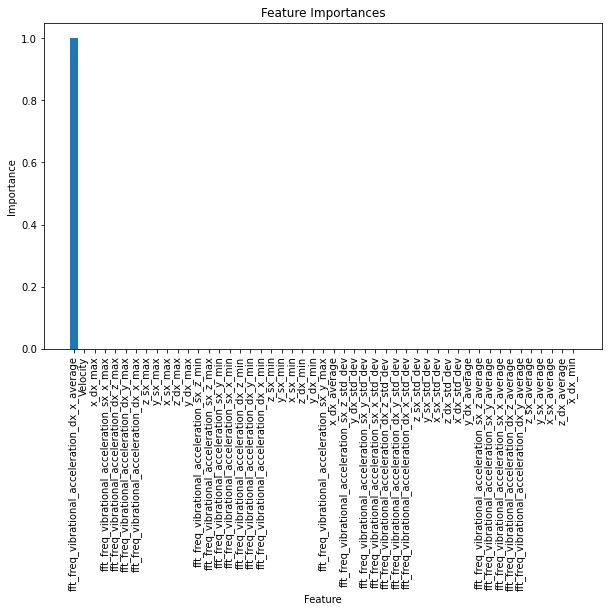

Top 5 Features:
fft_freq_vibrational_acceleration_dx_x_average: 1.0000
Velocity: 0.0000
x_dx_max: 0.0000
fft_freq_vibrational_acceleration_sx_x_max: 0.0000
fft_freq_vibrational_acceleration_dx_z_max: 0.0000
Classification Report on Test Set:
              precision    recall  f1-score   support

       crack       1.00      1.00      1.00      1713
        wear       1.00      1.00      1.00      1749

    accuracy                           1.00      3462
   macro avg       1.00      1.00      1.00      3462
weighted avg       1.00      1.00      1.00      3462



In [28]:
# Get feature importances
feature_importances = dt.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_idx = feature_importances.argsort()[::-1]
features = X.columns[sorted_idx]
importances = feature_importances[sorted_idx]
plt.bar(range(X.shape[1]), importances, align="center")
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

# Print the top N most important features
top_n = 5  # Change this value based on your preference
print(f"Top {top_n} Features:")
for feature, importance in zip(features[:top_n], importances[:top_n]):
    print(f"{feature}: {importance:.4f}")

# Continue with the rest of your modeling process
# For example, you can print classification reports or proceed with cross-validation
ypred = dt.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, ypred))


Decision tree model

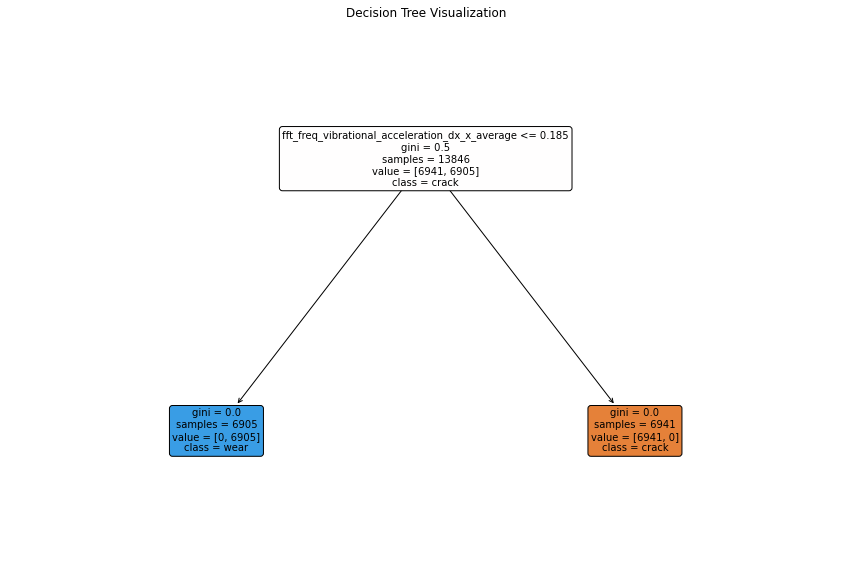

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'dt' is your trained Decision Tree model
# You can replace 'dt' with the actual model variable if you've used a different name

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=np.unique(y_train), rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

From our decision tree, we realized that almost all the axles with a crack have average  FFT frequency across one rotation more than 0.185 across the x-axis in wheel dx. This confirmed our initial hypothesis that axles with crack have a higher vibrational acceleration than worn down axle.

We were able to classify the cracks and worn axles with an accuracy of 99%.


Next, we set down to check if we can identify the intensity of the wear and crack using the same data.

In [30]:
condition = result_df['Class'] == 'wear'
df_wear = result_df[condition]
df_crack = result_df[~condition]

In [31]:
file_path = r"D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\df_wear.csv"
df_wear.to_csv(file_path, index=False)
print(f"DataFrame saved to: {file_path}")

DataFrame saved to: D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\df_wear.csv


In [32]:
file_path = r"D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\df_crack.csv"
df_crack.to_csv(file_path, index=False)
print(f"DataFrame saved to: {file_path}")

DataFrame saved to: D:\Mobility Sem 1\Data science for safety of mobility\LUCCINI Project\df_crack.csv


In [33]:
df_wear.head

<bound method NDFrame.head of        x_dx_min  y_dx_min  z_dx_min  x_sx_min  y_sx_min  z_sx_min  \
8654    -5.1552   -4.7126   -6.4597  -4.72280  -3.13970   -6.2245   
8655    -2.2997   -2.2059   -4.3376  -2.71610  -2.51210   -3.6699   
8656    -1.2706   -1.3422   -4.3044  -1.02430  -1.28020   -2.3935   
8657    -2.6398   -2.9617   -6.2075  -2.66950  -2.91810   -4.7488   
8658    -1.3144   -1.5370   -4.6647  -1.47590  -1.20450   -2.2902   
...         ...       ...       ...       ...       ...       ...   
17303   -1.0142   -1.0874   -3.7077  -0.76833  -0.95470   -1.9437   
17304   -1.1263   -1.2752   -3.8662  -0.69380  -0.97445   -2.1089   
17305   -1.1493   -1.2729   -5.2714  -1.28950  -0.96038   -3.4235   
17306   -2.2613   -2.4162   -4.8120  -2.54610  -2.76960   -4.1212   
17307   -2.3713   -2.1206   -4.8853  -2.21370  -2.16660   -3.1050   

       fft_freq_vibrational_acceleration_dx_x_min  \
8654                                 -3200.000000   
8655                               

In [34]:
df_crack.head

<bound method NDFrame.head of       x_dx_min  y_dx_min  z_dx_min  x_sx_min  y_sx_min  z_sx_min  \
0     -3.55190  -2.26690   -3.9759  -3.31980  -2.60000   -3.9974   
1     -3.53220  -2.26370   -4.7756  -3.33000  -2.35830   -3.8265   
2     -0.90950  -0.88017   -2.7341  -0.75261  -0.78363   -1.9606   
3     -6.06840  -3.90730   -7.7556  -3.98250  -2.86470   -4.7555   
4     -3.81440  -1.84640   -4.9085  -3.47580  -2.36290   -3.4117   
...        ...       ...       ...       ...       ...       ...   
8649  -1.53140  -1.10520   -2.7653  -1.21790  -0.93970   -2.3332   
8650  -4.25530  -2.35100   -4.8251  -3.07210  -2.41650   -3.9156   
8651  -1.32530  -0.87950   -1.8271  -0.87619  -0.82184   -1.7787   
8652  -1.15690  -1.18400   -3.5345  -1.05030  -1.14940   -2.1623   
8653  -0.96052  -1.17150   -2.6625  -0.87823  -0.82662   -2.0968   

      fft_freq_vibrational_acceleration_dx_x_min  \
0                                       0.000000   
1                                       0.369771 

In [35]:
df_wear = df_wear.drop('Class', axis=1)
df_crack = df_crack.drop('Class', axis=1)


In [36]:
print(df_wear.columns)

Index(['x_dx_min', 'y_dx_min', 'z_dx_min', 'x_sx_min', 'y_sx_min', 'z_sx_min',
       'fft_freq_vibrational_acceleration_dx_x_min',
       'fft_freq_vibrational_acceleration_dx_y_min',
       'fft_freq_vibrational_acceleration_dx_z_min',
       'fft_freq_vibrational_acceleration_sx_x_min',
       'fft_freq_vibrational_acceleration_sx_y_min',
       'fft_freq_vibrational_acceleration_sx_z_min', 'x_dx_max', 'y_dx_max',
       'z_dx_max', 'x_sx_max', 'y_sx_max', 'z_sx_max',
       'fft_freq_vibrational_acceleration_dx_x_max',
       'fft_freq_vibrational_acceleration_dx_y_max',
       'fft_freq_vibrational_acceleration_dx_z_max',
       'fft_freq_vibrational_acceleration_sx_x_max',
       'fft_freq_vibrational_acceleration_sx_y_max',
       'fft_freq_vibrational_acceleration_sx_z_max', 'x_dx_average',
       'y_dx_average', 'z_dx_average', 'x_sx_average', 'y_sx_average',
       'z_sx_average', 'fft_freq_vibrational_acceleration_dx_x_average',
       'fft_freq_vibrational_acceleration_dx_y

Defect Vs Standard deviation of axes of wear data

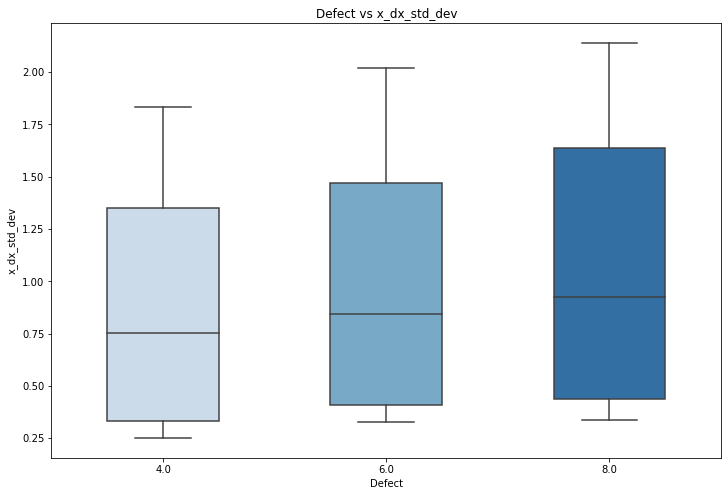

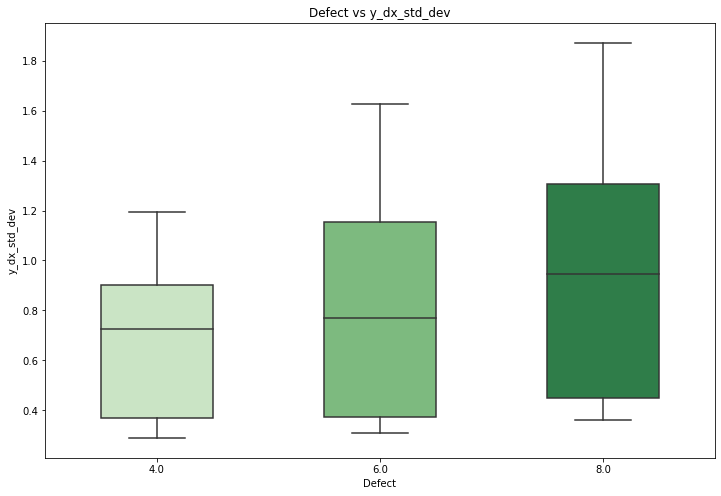

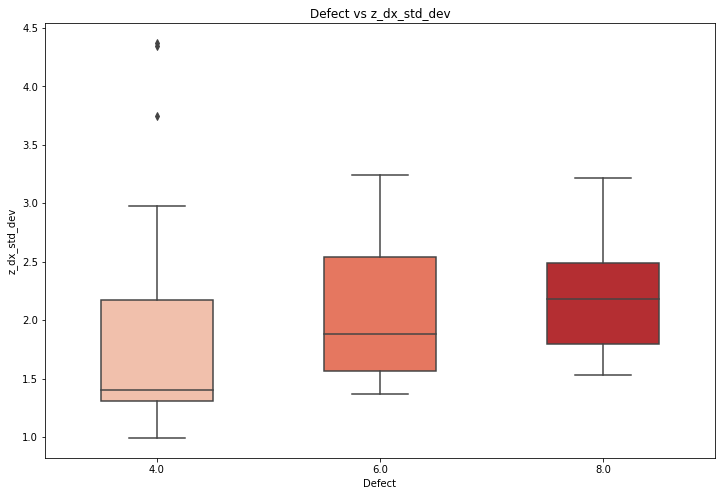

In [50]:
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Box plot for x_dx_std_dev
sns.boxplot(x='Defect', y='x_dx_std_dev', data=df_wear, palette='Blues', width=0.5)
plt.title('Defect vs x_dx_std_dev')
plt.xlabel('Defect')
plt.ylabel('x_dx_std_dev')
plt.show()

# Box plot for y_dx_std_dev
plt.figure(figsize=(12, 8))
sns.boxplot(x='Defect', y='y_dx_std_dev', data=df_wear, palette='Greens', width=0.5)
plt.title('Defect vs y_dx_std_dev')
plt.xlabel('Defect')
plt.ylabel('y_dx_std_dev')
plt.show()

# Box plot for z_dx_std_dev
plt.figure(figsize=(12, 8))
sns.boxplot(x='Defect', y='z_dx_std_dev', data=df_wear, palette='Reds', width=0.5)
plt.title('Defect vs z_dx_std_dev')
plt.xlabel('Defect')
plt.ylabel('z_dx_std_dev')
plt.show()

Decision tree for wear data

In [37]:
from sklearn.model_selection import train_test_split
radius_of_wheel = 0.46 
# Assuming 'Velocity', 'x_dx', 'y_dx', 'z_dx', and 'Radius' are columns in your DataFrame
# Assuming 'Defect' is the target variable you want to predict\
# Select columns to copy

# Create a new DataFrame with selected columns
X = df_wear[columns_list].copy()

# Features (X)
#X = final_df[['fft_vibrational_acceleration_dx_x','fft_vibrational_acceleration_dx_y','fft_vibrational_acceleration_dx_z','fft_vibrational_acceleration_sx_x','fft_vibrational_acceleration_sx_y','fft_vibrational_acceleration_sx_z','fft_freq_vibrational_acceleration_dx_x','fft_freq_vibrational_acceleration_dx_y','fft_freq_vibrational_acceleration_dx_z','fft_freq_vibrational_acceleration_sx_x','fft_freq_vibrational_acceleration_sx_y','fft_freq_vibrational_acceleration_sx_z','vibration_magnitude','Velocity', 'x_dx', 'y_dx', 'z_dx', 'radius_of_wheel']]
#X_subset = X.sample(frac=0.1, random_state=42).astype('complex64')


# Target variable (y)
y = df_wear["Defect"]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train represent the training data, and X_test and y_test represent the test data.


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have a Decision Tree model (dt) defined and trained
# For example, you can define and train the model as follows:
dt1 = DecisionTreeClassifier(min_samples_split=100, min_samples_leaf=100)
# dt.fit(X_train, y_train)

# Define the model name and classifier
name = 'Decision Tree'
model = dt1  # Ensure that 'dt' is defined and trained before using it here

# Assuming X_train, y_train, X_test, and y_test are defined
# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
ypred = model.predict(X_test)
ypred_train = model.predict(X_train)

# Print the classification report
print(name, '\n:')
print(classification_report(y_test, ypred))
print(classification_report(ypred_train, y_train))

# Perform 5-fold cross-validation
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation results
print("%s: %f (%f)" % (name, np.mean(cv_results) * 100, np.var(cv_results, ddof=1)))


Decision Tree 
:
              precision    recall  f1-score   support

         4.0       0.98      0.98      0.98       582
         6.0       0.96      0.93      0.95       551
         8.0       0.96      0.98      0.97       598

    accuracy                           0.97      1731
   macro avg       0.97      0.97      0.97      1731
weighted avg       0.97      0.97      0.97      1731

              precision    recall  f1-score   support

         4.0       0.99      0.98      0.98      2310
         6.0       0.95      0.97      0.96      2199
         8.0       0.98      0.98      0.98      2414

    accuracy                           0.97      6923
   macro avg       0.97      0.97      0.97      6923
weighted avg       0.97      0.97      0.97      6923

Decision Tree: 96.778917 (0.000047)


Using these features for classification, we were able to get an accuracy 96.7% after pre pruning.

Feature importance

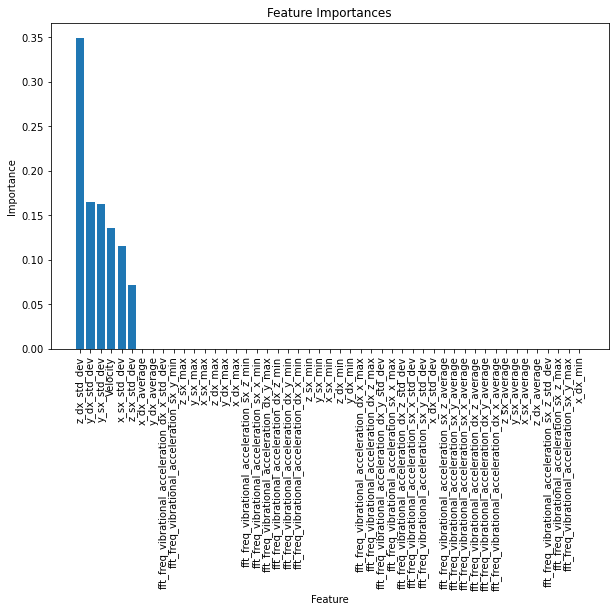

Top 5 Features:
z_dx_std_dev: 0.3492
y_dx_std_dev: 0.1646
y_sx_std_dev: 0.1629
Velocity: 0.1358
x_sx_std_dev: 0.1153
Classification Report on Test Set:
              precision    recall  f1-score   support

         4.0       0.98      0.98      0.98       582
         6.0       0.96      0.93      0.95       551
         8.0       0.96      0.98      0.97       598

    accuracy                           0.97      1731
   macro avg       0.97      0.97      0.97      1731
weighted avg       0.97      0.97      0.97      1731



In [39]:
# Get feature importances
feature_importances = dt1.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_idx = feature_importances.argsort()[::-1]
features = X.columns[sorted_idx]
importances = feature_importances[sorted_idx]
plt.bar(range(X.shape[1]), importances, align="center")
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

# Print the top N most important features
top_n = 5  # Change this value based on your preference
print(f"Top {top_n} Features:")
for feature, importance in zip(features[:top_n], importances[:top_n]):
    print(f"{feature}: {importance:.4f}")

# Continue with the rest of your modeling process
# For example, you can print classification reports or proceed with cross-validation
ypred = dt1.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, ypred))


While identifying the charatceristics of the defects under wear, the standard deviations of the following axes stood out - z-dx, y-dx, z- sx and x-sx 

Decision tree model

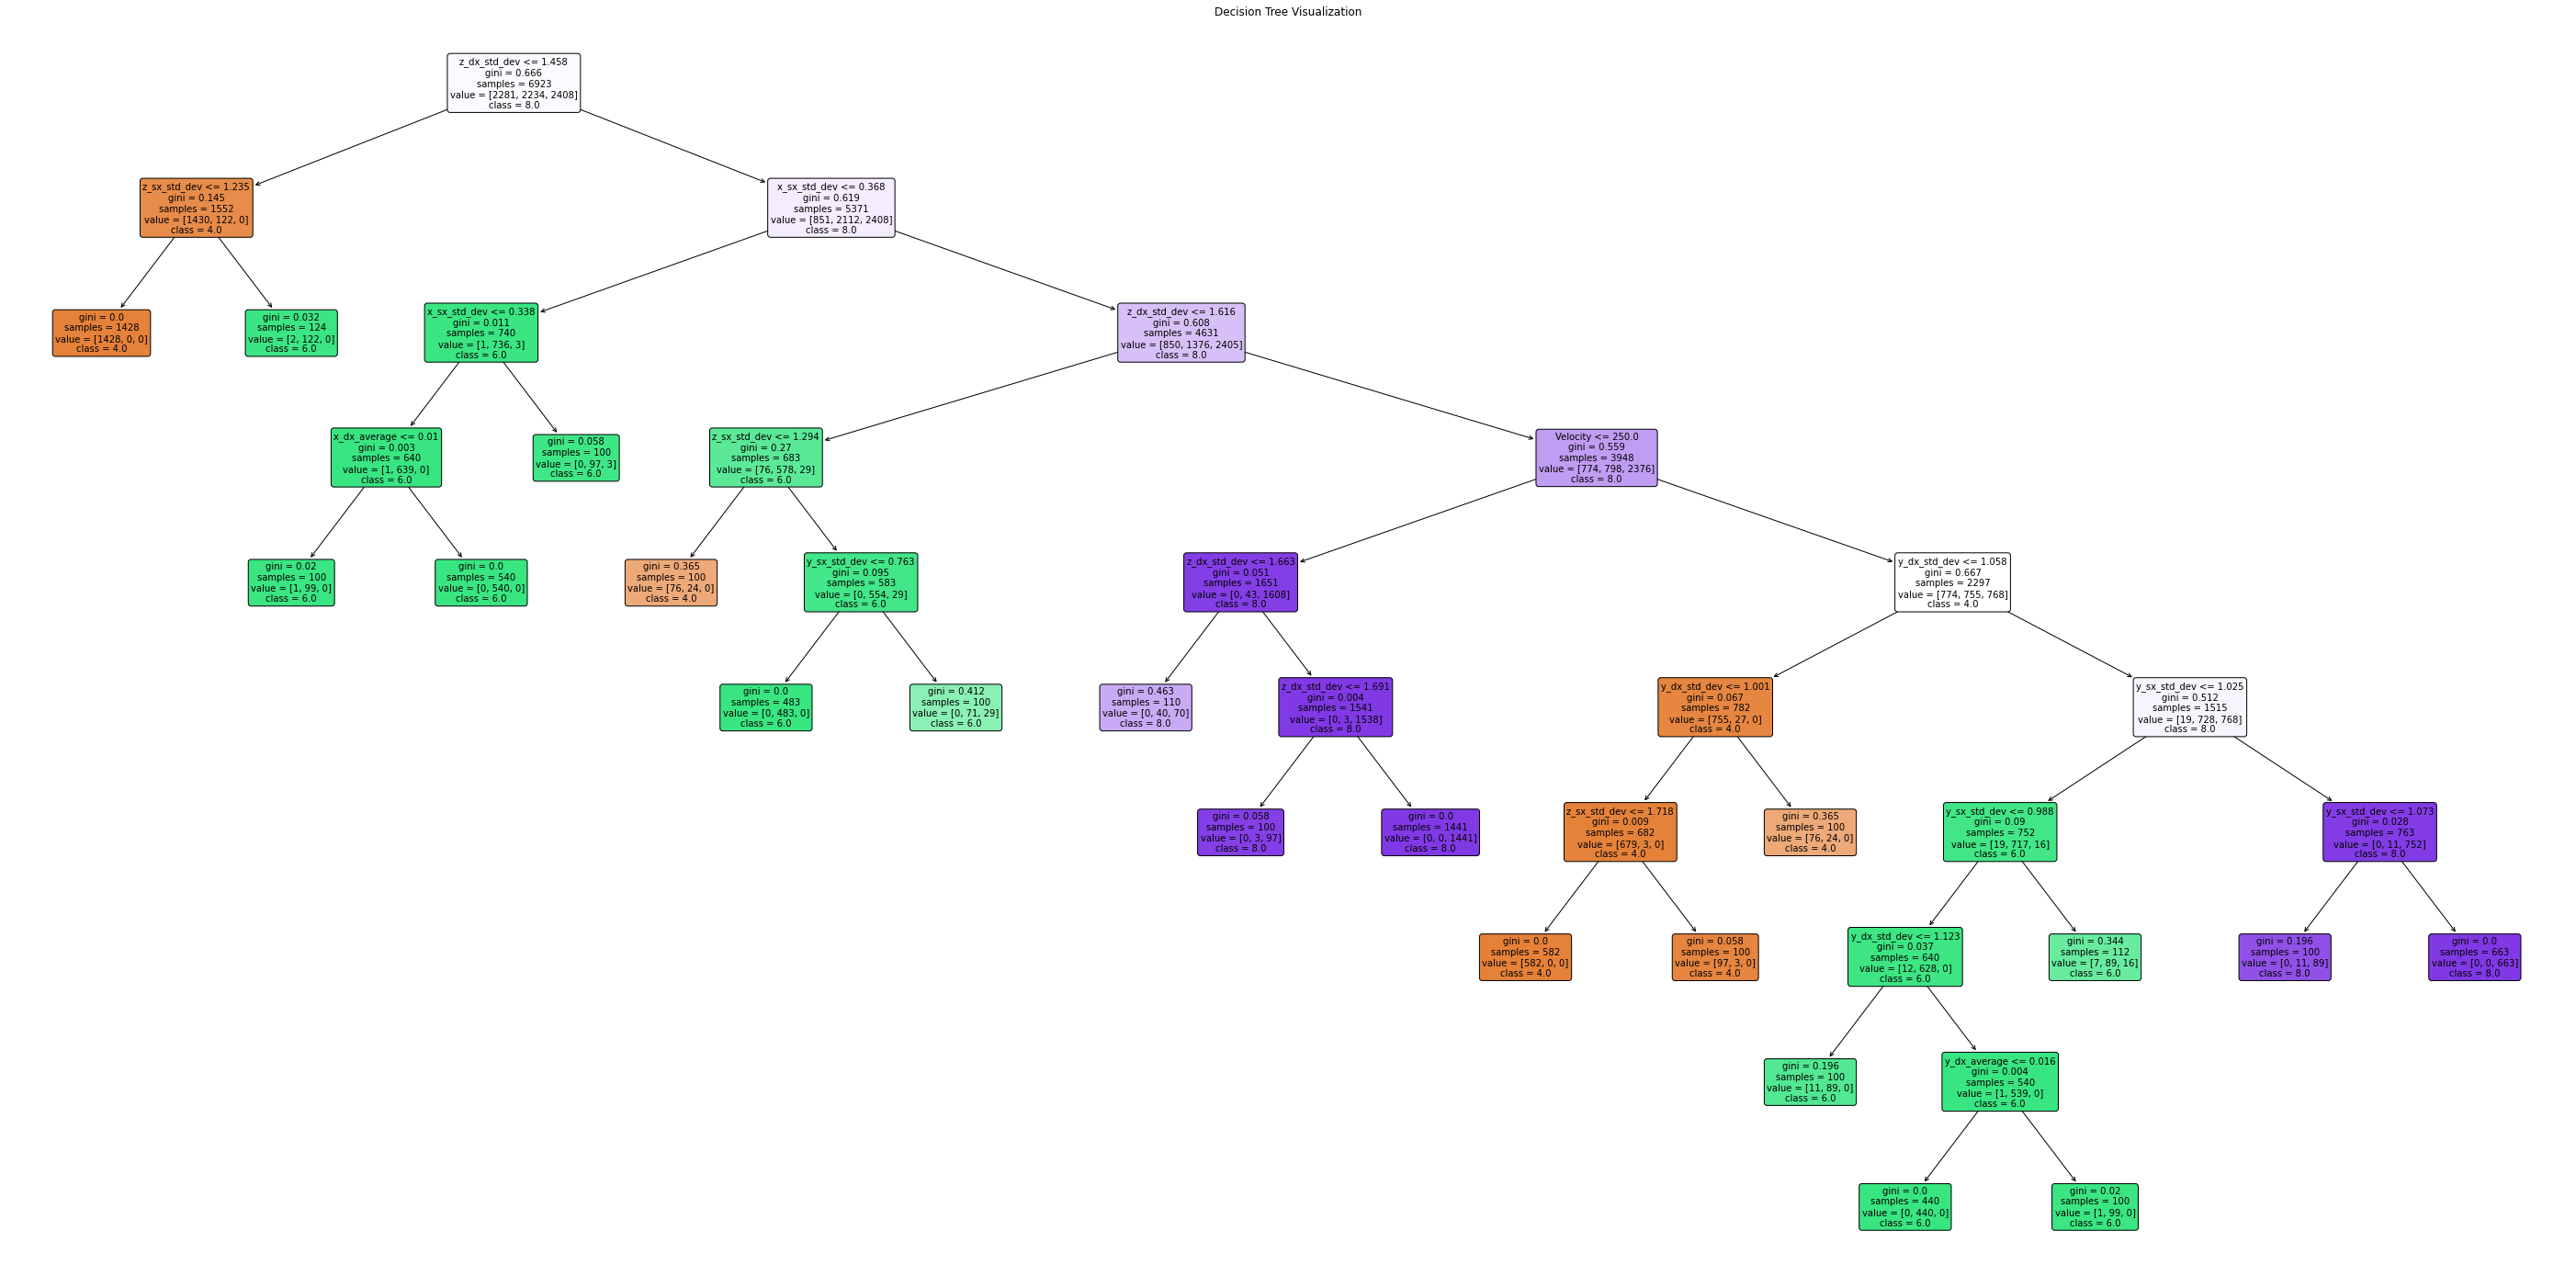

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'dt' is your trained Decision Tree model
# You can replace 'dt' with the actual model variable if you've used a different name
class_names_str = np.unique(y_train).astype(str)
# Plot the decision tree
plt.figure(figsize=(50, 25))
plot_tree(dt1, filled=True, feature_names=X_train.columns, class_names=class_names_str, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [41]:
y_train.dtypes

dtype('float64')

Defect Vs Standard deviation of axes of crack data

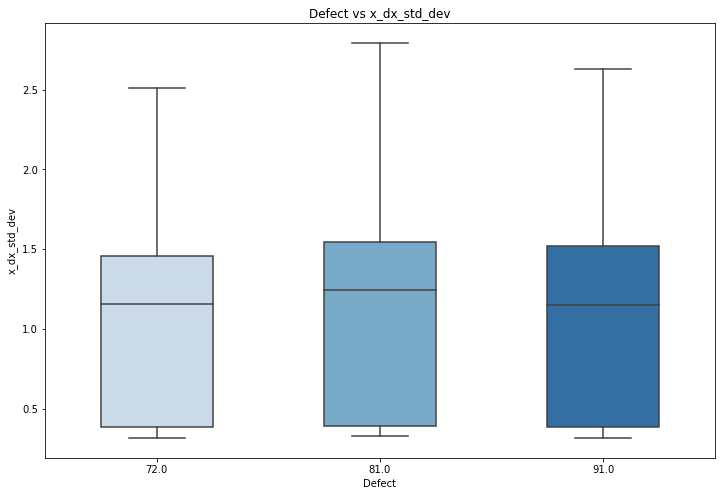

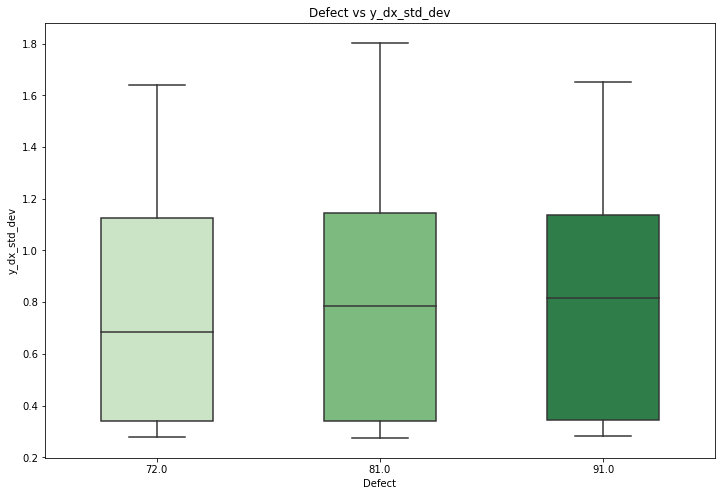

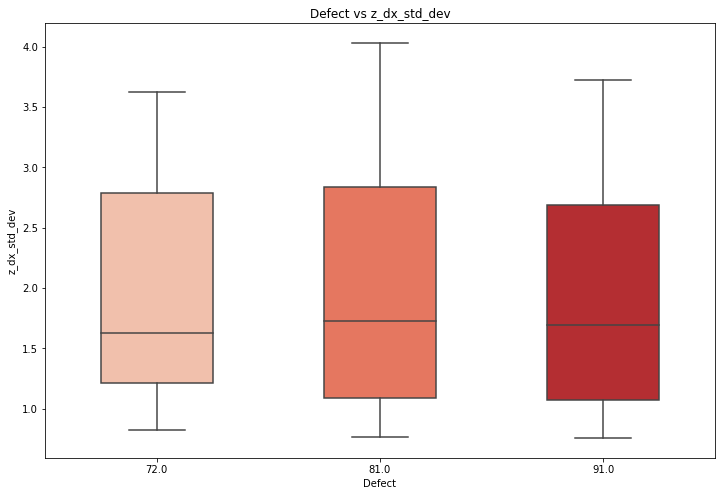

In [51]:
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Box plot for x_dx_std_dev
sns.boxplot(x='Defect', y='x_dx_std_dev', data=df_crack, palette='Blues', width=0.5)
plt.title('Defect vs x_dx_std_dev')
plt.xlabel('Defect')
plt.ylabel('x_dx_std_dev')
plt.show()

# Box plot for y_dx_std_dev
plt.figure(figsize=(12, 8))
sns.boxplot(x='Defect', y='y_dx_std_dev', data=df_crack, palette='Greens', width=0.5)
plt.title('Defect vs y_dx_std_dev')
plt.xlabel('Defect')
plt.ylabel('y_dx_std_dev')
plt.show()

# Box plot for z_dx_std_dev
plt.figure(figsize=(12, 8))
sns.boxplot(x='Defect', y='z_dx_std_dev', data=df_crack, palette='Reds', width=0.5)
plt.title('Defect vs z_dx_std_dev')
plt.xlabel('Defect')
plt.ylabel('z_dx_std_dev')
plt.show()

Decision Tree for crack data

In [42]:
print(df_crack.columns)

Index(['x_dx_min', 'y_dx_min', 'z_dx_min', 'x_sx_min', 'y_sx_min', 'z_sx_min',
       'fft_freq_vibrational_acceleration_dx_x_min',
       'fft_freq_vibrational_acceleration_dx_y_min',
       'fft_freq_vibrational_acceleration_dx_z_min',
       'fft_freq_vibrational_acceleration_sx_x_min',
       'fft_freq_vibrational_acceleration_sx_y_min',
       'fft_freq_vibrational_acceleration_sx_z_min', 'x_dx_max', 'y_dx_max',
       'z_dx_max', 'x_sx_max', 'y_sx_max', 'z_sx_max',
       'fft_freq_vibrational_acceleration_dx_x_max',
       'fft_freq_vibrational_acceleration_dx_y_max',
       'fft_freq_vibrational_acceleration_dx_z_max',
       'fft_freq_vibrational_acceleration_sx_x_max',
       'fft_freq_vibrational_acceleration_sx_y_max',
       'fft_freq_vibrational_acceleration_sx_z_max', 'x_dx_average',
       'y_dx_average', 'z_dx_average', 'x_sx_average', 'y_sx_average',
       'z_sx_average', 'fft_freq_vibrational_acceleration_dx_x_average',
       'fft_freq_vibrational_acceleration_dx_y

In [43]:
from sklearn.model_selection import train_test_split
radius_of_wheel = 0.46 
# Assuming 'Velocity', 'x_dx', 'y_dx', 'z_dx', and 'Radius' are columns in your DataFrame
# Assuming 'Defect' is the target variable you want to predict\
# Select columns to copy

# Create a new DataFrame with selected columns
X = df_crack[columns_list].copy()

# Features (X)
#X = final_df[['fft_vibrational_acceleration_dx_x','fft_vibrational_acceleration_dx_y','fft_vibrational_acceleration_dx_z','fft_vibrational_acceleration_sx_x','fft_vibrational_acceleration_sx_y','fft_vibrational_acceleration_sx_z','fft_freq_vibrational_acceleration_dx_x','fft_freq_vibrational_acceleration_dx_y','fft_freq_vibrational_acceleration_dx_z','fft_freq_vibrational_acceleration_sx_x','fft_freq_vibrational_acceleration_sx_y','fft_freq_vibrational_acceleration_sx_z','vibration_magnitude','Velocity', 'x_dx', 'y_dx', 'z_dx', 'radius_of_wheel']]
#X_subset = X.sample(frac=0.1, random_state=42).astype('complex64')


# Target variable (y)
y = df_crack["Defect"]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train represent the training data, and X_test and y_test represent the test data.


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have a Decision Tree model (dt) defined and trained
# For example, you can define and train the model as follows:
dt2 = DecisionTreeClassifier(min_samples_split=300, min_samples_leaf=300)
# dt.fit(X_train, y_train)

# Define the model name and classifier
name = 'Decision Tree'
model = dt2  # Ensure that 'dt' is defined and trained before using it here

# Assuming X_train, y_train, X_test, and y_test are defined
# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
ypred = model.predict(X_test)
ypred_train = model.predict(X_train)

# Print the classification report
print(name, '\n:')
print(classification_report(y_test, ypred))
print(classification_report(ypred_train, y_train))

# Perform 5-fold cross-validation
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation results
print("%s: %f (%f)" % (name, np.mean(cv_results) * 100, np.var(cv_results, ddof=1)))


Decision Tree 
:
              precision    recall  f1-score   support

        72.0       0.80      0.62      0.70       522
        81.0       0.64      0.67      0.65       648
        91.0       0.73      0.84      0.78       561

    accuracy                           0.71      1731
   macro avg       0.72      0.71      0.71      1731
weighted avg       0.72      0.71      0.71      1731

              precision    recall  f1-score   support

        72.0       0.65      0.85      0.73      1576
        81.0       0.70      0.65      0.67      2700
        91.0       0.85      0.76      0.81      2647

    accuracy                           0.74      6923
   macro avg       0.73      0.75      0.74      6923
weighted avg       0.75      0.74      0.74      6923

Decision Tree: 70.070825 (0.000168)


To identify the charatceristics of the defects under crack, the standard deviation of the three axes of the wheel sx were used. Although it followed almost the same pattern of cracks of lower length having lower standard deviations, several overlaps were seen between the three classes leading to an accuracy of 70%. This could be attributed to the different states of compression and traction

Feature Importance

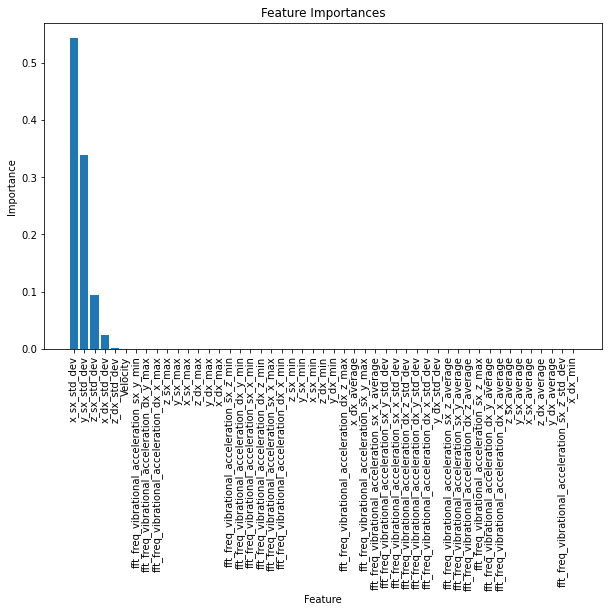

Top 5 Features:
x_sx_std_dev: 0.5429
y_sx_std_dev: 0.3383
z_sx_std_dev: 0.0946
x_dx_std_dev: 0.0233
z_dx_std_dev: 0.0009
Classification Report on Test Set:
              precision    recall  f1-score   support

        72.0       0.80      0.62      0.70       522
        81.0       0.64      0.67      0.65       648
        91.0       0.73      0.84      0.78       561

    accuracy                           0.71      1731
   macro avg       0.72      0.71      0.71      1731
weighted avg       0.72      0.71      0.71      1731



In [48]:
# Get feature importances
feature_importances = dt2.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_idx = feature_importances.argsort()[::-1]
features = X.columns[sorted_idx]
importances = feature_importances[sorted_idx]
plt.bar(range(X.shape[1]), importances, align="center")
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

# Print the top N most important features
top_n = 5  # Change this value based on your preference
print(f"Top {top_n} Features:")
for feature, importance in zip(features[:top_n], importances[:top_n]):
    print(f"{feature}: {importance:.4f}")

# Continue with the rest of your modeling process
# For example, you can print classification reports or proceed with cross-validation
ypred = dt2.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, ypred))


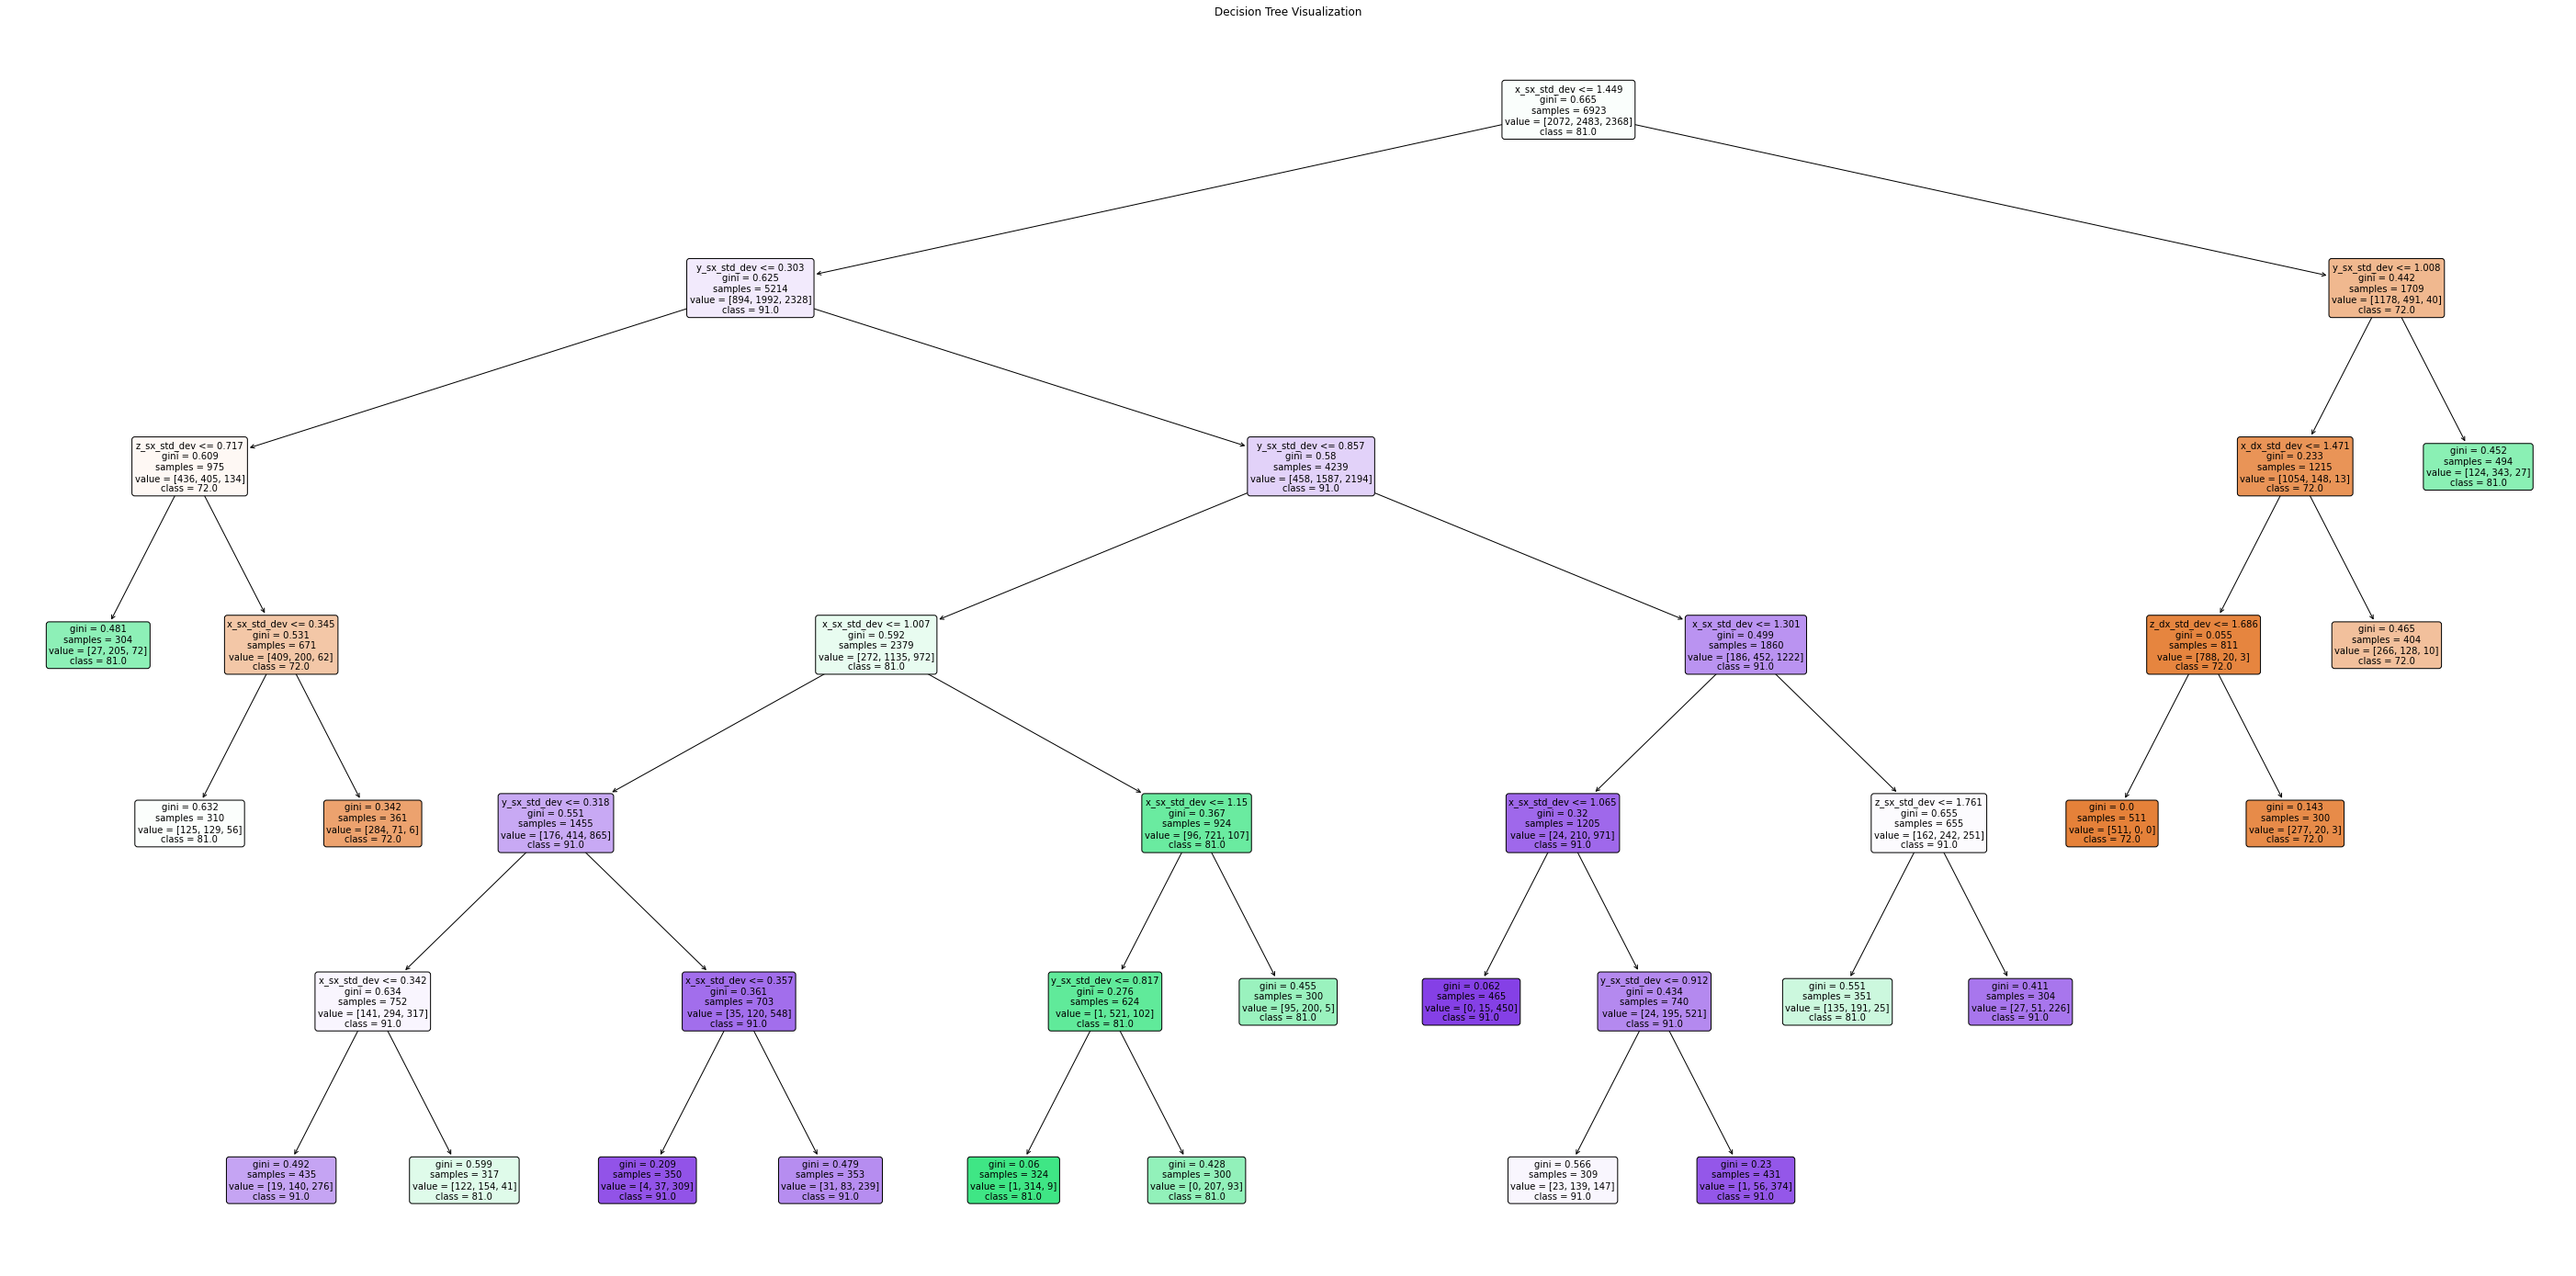

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'dt' is your trained Decision Tree model
# You can replace 'dt' with the actual model variable if you've used a different name
class_names_str = np.unique(y_train).astype(str)
# Plot the decision tree
plt.figure(figsize=(50, 25))
plot_tree(dt2, filled=True, feature_names=X_train.columns, class_names=class_names_str, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

Future Scope:
     In the future, we can extend our current analysis to include the crack breathing mechanism to identify the states of compression and traction for analysis which could lead to a better classification among the lengths of crack.